# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

1. Is the distribution of body temperatures normal?
   * Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
   * Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy import stats

In [6]:
# define a empirical CDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [11]:
# separate Male and Female data to test if they have different distribution
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

male mean temperature:  98.1046153846154 ;      female mean temperature:  98.39384615384613


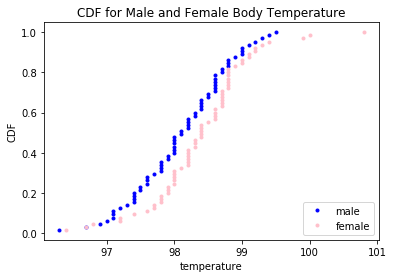

In [42]:
# use CDF to graphically test whether male and female follow different distribution
x_m, y_m = ecdf(df_male['temperature'])
x_f, y_f = ecdf(df_female['temperature'])

_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='pink')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
_ = plt.title('CDF for Male and Female Body Temperature')
_ = plt.legend(('male', 'female'), loc='lower right')

print('male mean temperature: ', np.mean(df_male['temperature']), ';      female mean temperature: ', np.mean(df_female['temperature']))

The CDF plot above suggests that male and female body temperature follow different distribution. Female mean body temperature is higher than that of male by ~0.29F.

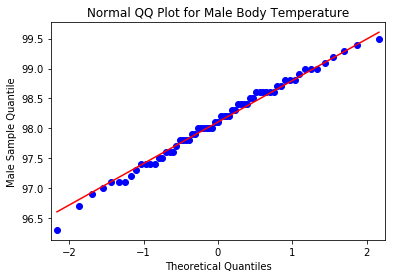

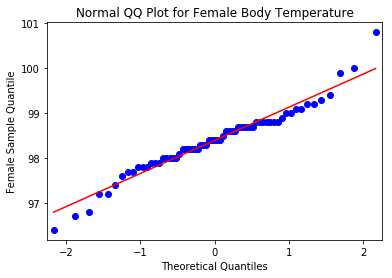

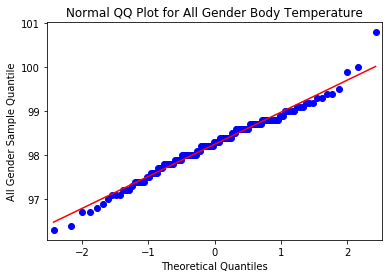

In [43]:
# use QQ plot to graphically check normality
qqplot(df_male['temperature'], line='s')
_ = plt.ylabel('Male Sample Quantile')
_ = plt.title('Normal QQ Plot for Male Body Temperature')
qqplot(df_female['temperature'], line='s')
_ = plt.ylabel('Female Sample Quantile')
_ = plt.title('Normal QQ Plot for Female Body Temperature')

qqplot(df['temperature'], line='s')
_ = plt.ylabel('All Gender Sample Quantile')
_ = plt.title('Normal QQ Plot for All Gender Body Temperature')

QQ plots above suggest that male body temperature data is normally distributed, female body temperature data is mostly normally distributed expect for one possible outlier at high end that deviates from normal distribution. 

In [36]:
# Shapiro-Wilk Test for normality
stat_m, p_m = shapiro(df_male['temperature'])
print('Male: Statistics=%.3f, p=%.3f' % (stat_m, p_m))

stat_f, p_f = shapiro(df_female['temperature'])
print('Female: Statistics=%.3f, p=%.3f' % (stat_f, p_f))

stat_all, p_all = shapiro(df['temperature'])
print('All Genders: Statistics=%.3f, p=%.3f' % (stat_all, p_all))

Male: Statistics=0.989, p=0.855
Female: Statistics=0.968, p=0.090
All Genders: Statistics=0.987, p=0.233


Shapiro-Wilk Test for normality above shows p-value of 0.855 for male body temperature, and 0.090 for female body temperature. We failed to reject normal distribution for both male and female temperature data at 5% level, but female temperature has a pretty small p-value and will be rejected noraml distribution hypothesis at 10% level.

In [37]:
# D'Agostino and Pearson's Test for normality
stat_m, p_m = normaltest(df_male['temperature'])
print('Male: Statistics=%.3f, p=%.3f' % (stat_m, p_m))

stat_f, p_f = normaltest(df_female['temperature'])
print('Female: Statistics=%.3f, p=%.3f' % (stat_f, p_f))

stat_all, p_all = normaltest(df['temperature'])
print('All Genders: Statistics=%.3f, p=%.3f' % (stat_all, p_all))

Male: Statistics=0.891, p=0.640
Female: Statistics=4.735, p=0.094
All Genders: Statistics=2.704, p=0.259


D'Agostino and Pearson's Test for normality above shows p-value of 0.640 for male body temperature, and 0.094 for female body temperature. Conclusion is the same as for Shapiro-Wilk Test. We failed to reject normal distribution for both male and female temperature data at 5% level, but female temperature has a pretty small p-value and will be rejected noraml distribution hypothesis at 10% level.

In [41]:
# Anderson-Darling Test for normality
result = anderson(df_male['temperature'])
print('Statistic: %.3f' % result.statistic)
print(result)

result = anderson(df_female['temperature'])
print('Statistic: %.3f' % result.statistic)
print(result)

result = anderson(df['temperature'])
print('Statistic: %.3f' % result.statistic)
print(result)

Statistic: 0.208
AndersonResult(statistic=0.20825514476277363, critical_values=array([0.546, 0.621, 0.746, 0.87 , 1.034]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 0.690
AndersonResult(statistic=0.6895675921649058, critical_values=array([0.546, 0.621, 0.746, 0.87 , 1.034]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 0.520
AndersonResult(statistic=0.5201038826714353, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Anderson-Darling Test for normality above shows test statistic of 0.208 for male, and 0.690 for female. We failed to reject normal distribution for both male and female temperature data at 5% level, but will reject normal distribution hypothesis for female temperature 10% level and above (test statistic of 0.690 is greater than critical value of 0.637 at significance level at 10% and above. So the conclusion stays the same as we got from Shapiro-Wilk and D'Agostino and Pearson's tests.

2. Is the sample size large? Are the observations independent?
   * Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

The dataset in this project came from a paper published on Journal of American Medical Association in 1992 Sep 23-30;268(12):1578-80.
Paper is titled: A critical appraisal of 98.6 degrees F, the upper limit of the normal body temperature, and other legacies of Carl Reinhold August Wunderlich, by Mackowiak PA1, Wasserman SS, Levine MM.
https://www.ncbi.nlm.nih.gov/pubmed/1302471

Data was collected by Inpatient clinical research unit. Participants are one hundred forty-eight healthy men and women aged 18 through 40 years. Oral temperatures were measured one to four times daily for 3 consecutive days using an electronic digital thermometer.

Final dataset contains body temperatures of 130 male and 130 female participants, supposedly (not verified) mean temperatures from all measurements made on individuals.

Sample size is decent but not large. Based on information gathered above, all the observations are independent assuming (not verified) that all participants are not related to each other (e.g. family members from same households, or relatives, etc.)

3. Is the true population mean really 98.6 degrees F?
   * First, try a bootstrap hypothesis test.
   * Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
   * In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
   * Now try using the other test. How is the result be different? Why?

In [44]:
# function to do one sample bootstrap
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_samples = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_samples)

    return bs_replicates

Observed mean body temperature:  98.24923076923078
Observed std of body temperature:  0.7331831580389454
p-value for bootstrap sample mean less than observed mean body temperature:  0.0


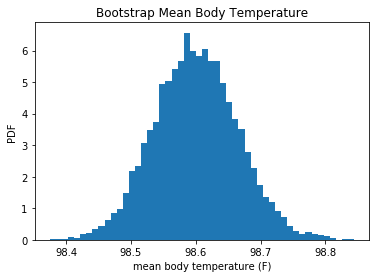

In [101]:
mean_obs = np.mean(df['temperature'])
std_obs = np.std(df['temperature'], ddof=1)

# shift mean of temperature data to 98.6F to perform one sample hypothesis test
temperature_all = df['temperature'] - mean_obs + 98.6
bs_replicates = draw_bs_reps(temperature_all, np.mean, 10000)
p = np.sum(bs_replicates <= mean_obs) / len(bs_replicates)
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean body temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Mean Body Temperature')
print('Observed mean body temperature: ', mean_obs)
print('Observed std of body temperature: ', std_obs)
print('p-value for bootstrap sample mean less than observed mean body temperature: ', p)

In [78]:
# use 1-sample t-test
t = (mean_obs - 98.6) / (std_obs / np.sqrt(len(df['temperature'])))
# 1-sided p-value (probability lower than t value)
p = stats.t.cdf(t, df=len(df['temperature'] -1))

# cross-checking with internal scipy function, which generates the same t-statistic -5.4548. p-value is two sided
t_results = stats.ttest_1samp(df['temperature'], 98.6)

print('t-statistic: ', t, ',   p-value:', p)
print(t_results)

t-statistic:  -5.753881586901884 ,   p-value: 2.9707318878638504e-08
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Both bootstrap method and t-test rejected the null hypothesis that the true population mean is 98.6 degrees F. Bootstrap has 0 out of 10000 simulated cases with mean temperature at or above 98.6 F. T-test gives p-value at ~e-7.
One sample t-test is used because we are comparing to a fixed value (hypothesized population mean).
It is appropriate to use t statistic, because population standard deviation is not known and sample standard deviation is used as an estimate.

In [79]:
# use z statistic for comparision
# 1-sided p-value (probability lower than t value)
p = stats.norm.cdf(t)

print('z-statistic: ', t, ',   p-value:', p)

z-statistic:  -5.753881586901884 ,   p-value: 4.360862966280354e-09


z-statistic gives a slightly more extreme statistic than t-statistic (z-statistic of -5.4759 comparing to t-statistic of -5.4548). It does not significantly change p-value and conclusion. This is because when sample sample is relatively large (>30), a t-distribution is approaching a normal distribution.

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
   * Which one is the correct one to use?
   * What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [82]:
# randomly draw sample size of 10 from the data
sample_10 = np.random.choice(df['temperature'], size=10)

# mean of sample size 10
mean_obs = np.mean(sample_10)
# standard error of mean for sample size 10, for t-test
std_obs_t = np.std(sample_10, ddof=1)

# use t statistic
t = (mean_obs - 98.6) / (std_obs_t / np.sqrt(len(sample_10)))
# 1-sided p-value using t-distribution (probability lower than t value)
p_t = stats.t.cdf(t, df=len(sample_10) -1)

# 1-sided p-value using normal distribution (probability lower than z value)
p_z = stats.norm.cdf(t)

print('t-statistic: ', t, ',   p-value using t:', p_t, ',   p-value using z:', p_z)

t-statistic:  -1.7862011279397376 ,   p-value using t: 0.053857930654151454 ,   p-value using z: 0.03703334926811911


Above shows the comparison between t test and z test on the same sample of size 10. T-test is the correct one to use because population deviation is not known and needs to be estimated with sample standard error of the mean.

T-distribution has a longer tail than normal distribution, especially when sample size is small. Consequently with the same test statistic, t test would give higher tail probability thus higher p-value than z test. This is confirmed by repeatedly running the above cell.

When sample size becomes large (>30 for example), t-distribution becomes closer and closer to normal distribution.

5. At what temperature should we consider someone's temperature to be "abnormal"?
   * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
   * Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Observed mean body temperature:  98.24923076923078 99.97661028957053
Observed std of body temperature:  0.7331831580389454
Bootstrap mean 99% body temperature:  100.00119839999999


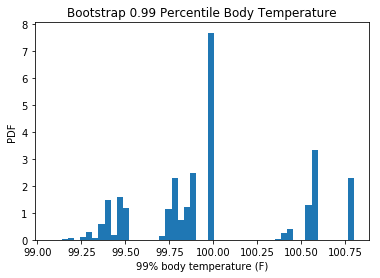

In [92]:
# use bootstrap apprach
# function to do one sample bootstrap to calculate 99% percentile from BS samples
def draw_bs_reps_99(data, size=1):
    """Draw bootstrap replicates to calculate 99% percentile."""

    # Initialize array of replicates: bs_replicates
    bs_replicates_99 = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_samples = np.random.choice(data, size=len(data))
        bs_replicates_99[i] = np.percentile(bs_samples, [99])

    return bs_replicates_99

bs_replicates_99 = draw_bs_reps_99(df['temperature'], 10000)
mean_99 = np.mean(bs_replicates_99)
#p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
_ = plt.hist(bs_replicates_99, bins=50, density=True)
_ = plt.xlabel('99% body temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap 0.99 Percentile Body Temperature')
print('Bootstrap mean 99% body temperature: ', mean_99)

In [93]:
# use frequentist approach
mean_obs = np.mean(df['temperature'])
std_obs = np.std(df['temperature'], ddof=1)

# using R to find out 99% quantile is 2.3556 for t-distribution with DF=129 (sample size of 130 minus 1)
q_t_99 = 2.3556
temp_cut = mean_obs + q_t_99 * std_obs
print('99% body temperature using t-distribution: ', temp_cut)

99% body temperature using t-distribution:  99.97631701630732


As shown above, above 100 F should be considered as abnormal body temperature. Bootstrap gives 100F, and frequentist method based on t-distribution gives 99.98F as 99% quantile body temperature. We consider above 99% quantile as abnormal body temperature.

6. Is there a significant difference between males and females in normal temperature?
   * What testing approach did you use and why?
   * Write a story with your conclusion in the context of the original problem.

In [100]:
# using bootstrap two sample test approach
# first shift male and female temperature data to have combined mean body temperature
temperature_male = df_male['temperature'] - np.mean(df_male['temperature']) + mean_obs
temperature_female = df_female['temperature'] - np.mean(df_female['temperature']) + mean_obs

# draw BS samples
bs_replicates_male = draw_bs_reps(temperature_male, np.mean, 10000)
bs_replicates_female = draw_bs_reps(temperature_female, np.mean, 10000)

# calculates difference between mean male temperature and mean female temperature, and construct 95% confidence interval
bs_replicates_diff = bs_replicates_male - bs_replicates_female
bs_replicates_int = np.percentile(bs_replicates_diff, [2.5, 97.5])

# observed mean temperature difference between male and female
diff_obs = np.mean(df_male['temperature']) - np.mean(df_female['temperature'])
p_diff = np.sum(bs_replicates_diff <= diff_obs) / len(bs_replicates_diff)

print('Observed mean body temperature difference between male and female: ', diff_obs)
print('95% confidence interval assuming there is no difference in mean body temperature: ', bs_replicates_int)
print('p value for observed difference under no difference hypothesis:  ', p_diff)

Observed mean body temperature difference between male and female:  -0.289230769230727
95% confidence interval assuming there is no difference in mean body temperature:  [-0.24307692  0.24153846]
p value for observed difference under no difference hypothesis:   0.0107


In [102]:
# using frequentist approach, 2-sample test
t2_results = stats.ttest_ind(df_male['temperature'], df_female['temperature'])
print(t2_results)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


As shown above, both bootstrap and frequentist approaches reject the null hypothesis that male and female have same mean body temperature, with a small p-value of about 1% (1-sided tail probability).

This suggests that we should use different cut-off values for male and female in assessing whether a patient has normal body temperature. The difference is fairly small though, with male mean body temperature being ~0.3 F lower than that of female.